# This Nodebook focusses on testing the Model performance

1. Load dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.utils import to_categorical

1. Load data

In [19]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Class names

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

3. Preprocess data

In [4]:
def normalization(test_images):
    return test_images/255.0

def resize(test_images):
    test_images = tf.image.resize(test_images, (224, 224)).numpy()
    return test_images

def categorical(test_labels):
    test_labels = to_categorical(test_labels, 10)
    return test_labels

In [5]:
normalised = normalization(test_images)

In [6]:
resized = resize(normalised)

In [7]:
categorical_labels = categorical(test_labels)

In [14]:
test_images = resized
test_labels = categorical_labels

4. Load the trained model

In [9]:
import pickle
# Load the model
with open("model.pkl", "rb") as file:
    model = pickle.load(file)
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


5. Make predictions

In [20]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [21]:
predicted_classes = np.argmax(predictions, axis=1)
#
actual_classes = np.argmax(test_labels, axis=1)  # Convert one-hot to class labels

6. Accuracy

In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_labels, predicted_classes)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.4586


7. Calculate precision_score, recall_score, f1_score

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_labels, predicted_classes, average="weighted")
recall = recall_score(test_labels, predicted_classes, average="weighted")
f1 = f1_score(test_labels, predicted_classes, average="weighted")

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.5605
Recall: 0.4586
F1 Score: 0.4218


8. Confusion Matrix

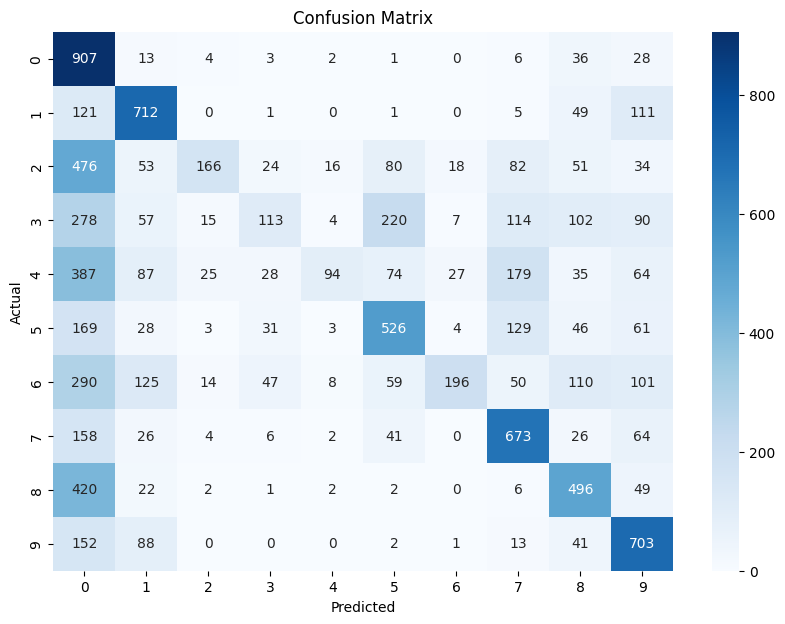

In [24]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()